In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data =pd.read_csv("/content/gdrive/MyDrive/Google Colab/data_analyzed_50k.csv", on_bad_lines='skip')

In [ ]:
data.shape

(50000, 28)

In [ ]:
data.head(1)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,data len,...,Lemmatized,Stemmed:Sentence,Stemmed:Tokens,Stemmed_Word_Count,Positive_Word_Count,Positive_Words_%,Negative_Word_Count,Negative_Words_%,Polarity,Subjectivity
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",7/7/2018 22:09,515,...,decide eat aware going take 2 hour beginning e...,decid eat awar go take 2 hour begin end tri mu...,"['decid', 'eat', 'awar', 'go', 'take', '2', 'h...",45,8,0.166667,3,0.0625,0.198485,0.412121


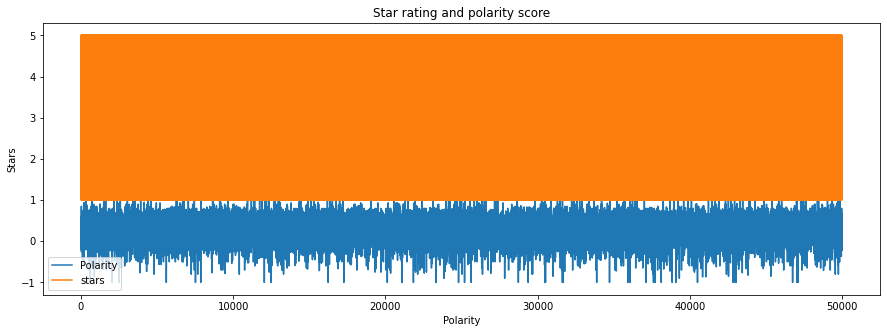

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
data['Polarity'].plot()
data['stars'].plot()
plt.title('Star rating and polarity score')
plt.xlabel('Polarity')
plt.ylabel('Stars')
plt.legend()

In [ ]:
# Categorization and Dummy Variables
yelp_data_s = data[data['Polarity'] != 0]
yelp_data_s = yelp_data_s.reset_index()

In [ ]:
sentiment = []
for i in range(len(yelp_data_s)):
    if yelp_data_s['Polarity'][i] > 0:
        sentiment.append('Positive')
    if yelp_data_s['Polarity'][i] < 0:
        sentiment.append('Negative')
yelp_data_s['sentiment'] = sentiment

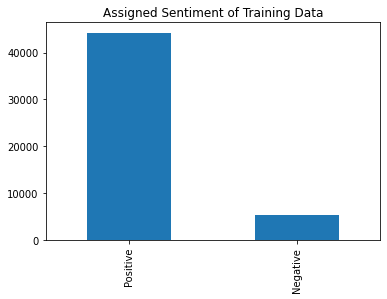

In [ ]:
yelp_data_s['sentiment'].value_counts().plot(kind='bar')
plt.title('Assigned Sentiment of Training Data');

In [ ]:
print(yelp_data_s.shape)

(49476, 30)


In [ ]:
# sorting more for better results
sentiment = []
for i in range(len(yelp_data_s)):
    if yelp_data_s['Polarity'][i] >= 0.5:
        yelp_data_s['sentiment'][i] = 5
    elif yelp_data_s['Polarity'][i] >= 0.4:
        yelp_data_s['sentiment'][i] = 4
    elif yelp_data_s['Polarity'][i] >= 0.2:
        yelp_data_s['sentiment'][i] = 3
    elif yelp_data_s['Polarity'][i] >= 0.0:
          yelp_data_s['sentiment'][i] = 2
    else:
        yelp_data_s['sentiment'][i] = 1



<ipython-input-50-6cb65a2c0e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_data_s['sentiment'][i] = 2
<ipython-input-50-6cb65a2c0e93>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_data_s['sentiment'][i] = 3
<ipython-input-50-6cb65a2c0e93>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_data_s['sentiment'][i] = 4
<ipython-input-50-6cb65a2c0e93>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

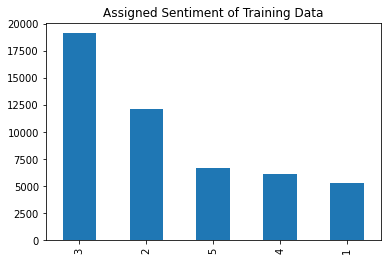

In [ ]:
yelp_data_s['sentiment'].value_counts().plot(kind='bar')
plt.title('Assigned Sentiment of Training Data');

In [ ]:
yelp_data_s.head()

,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,...,Stemmed:Sentence,Stemmed:Tokens,Stemmed_Word_Count,Positive_Word_Count,Positive_Words_%,Negative_Word_Count,Negative_Words_%,Polarity,Subjectivity,sentiment
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",7/7/2018 22:09,...,decid eat awar go take 2 hour begin end tri mu...,"['decid', 'eat', 'awar', 'go', 'take', '2', 'h...",45,8,0.166667,3,0.062500,0.198485,0.412121,2
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,1/3/2012 15:28,...,ive taken lot spin class year noth compar clas...,"['ive', 'taken', 'lot', 'spin', 'class', 'year...",84,18,0.206897,1,0.011494,0.395455,0.571212,3
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2/5/2014 20:30,...,famili diner buffet eclect assort larg chicken...,"['famili', 'diner', 'buffet', 'eclect', 'assor...",39,6,0.150000,2,0.050000,0.139935,0.522294,2
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",1/4/2015 0:01,...,wow yummi differ delici favorit lamb curri kor...,"['wow', 'yummi', 'differ', 'delici', 'favorit'...",24,5,0.208333,2,0.083333,0.315152,0.733838,3
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,1/14/2017 20:54,...,cute interior owner gave u tour upcom patioroo...,"['cute', 'interior', 'owner', 'gave', 'u', 'to...",63,12,0.190476,1,0.015873,0.416234,0.490260,4


In [ ]:
yelp_data_s.columns

Index(['index', 'review_id', 'user_id', 'business_id', 'stars', 'useful',
       'funny', 'cool', 'text', 'date', 'data len', 'Review_Word_Count',
       'Review_Char_Count', 'Lowercase', 'Cleaned', 'No_Stop_Words:Tokens',
       'No_Stop_Words:Sentence', 'Stop_Word_Count', 'Stop_Words_%',
       'Lemmatized', 'Stemmed:Sentence', 'Stemmed:Tokens',
       'Stemmed_Word_Count', 'Positive_Word_Count', 'Positive_Words_%',
       'Negative_Word_Count', 'Negative_Words_%', 'Polarity', 'Subjectivity',
       'sentiment'],
      dtype='object')

In [ ]:
yelp_data_sentiments=yelp_data_s[['stars','sentiment']]

In [ ]:
yelp_data_sentiments.to_csv(r'yelp_data_sentiments.csv',index=False)

In [ ]:
yelp_data_sentiments.head()

,stars,sentiment
0,3,2
1,5,3
2,3,2
3,5,3
4,4,4


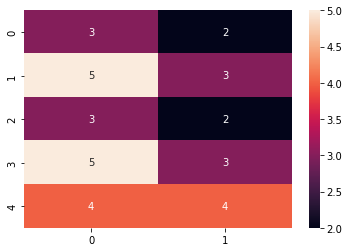

In [ ]:
##from sklearn import datasets
##import pandas as p
##* * *import seaborn
## matplotlib. pyplot as pt
##import seaborn as sns

#type(yelp_data_sentiments)
##yelp_data_sentiments = yelp_data_sentiments.fillna(0.0)
##data_array = np.asarray(yelp_data_sentiments.head())

##ax = sns.heatmap(data_array, annot=True) * * *



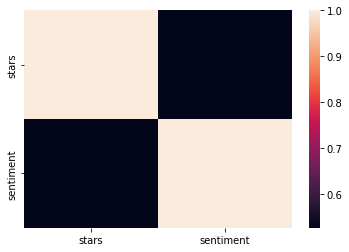

In [ ]:
from sklearn import datasets
import pandas as p
import seaborn
import matplotlib. pyplot as pt
import seaborn as sns

#type(yelp_data_sentiments)
yelp_data_sentiments = yelp_data_sentiments.fillna(0.0)

sns.heatmap(yelp_data_sentiments.corr())

